In [1]:
from pytorch_lightning.loggers import WandbLogger
from engine import Ctok
from STIMDataset import LabellingStrategy, STIMDataset
from model import Model
from pytorch_lightning import Trainer

In [2]:
import wandb
wandb.login()

wandb: Currently logged in as: iamkucuk (use `wandb login --relogin` to force relogin)


True

In [3]:
model = Model()
dataset = STIMDataset(csv_file = "SPY.csv", label_method=LabellingStrategy.zigzag, strategy_kwargs={"up_thresh":.05, "down_thresh":-.05})
engine = Ctok(model=model, dataset=dataset, learning_rate=0.1, batch_size=1024)
tb_logger = WandbLogger(project="cnn-ta")
trainer = Trainer(
    logger=tb_logger,
    benchmark=True,
    num_sanity_val_steps=0,
    reload_dataloaders_every_epoch=True,
    max_epochs=70
)
trainer.fit(engine)

Creating labels:   0%|          | 0/7057 [00:00<?, ?it/s]

Creating indicators:   0%|          | 0/14 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [4]:
engine.hist_training.get_results()

{'Hold': 2467.0, 'Buy': 2432.0, 'Sell': 14161.0}

Creating labels:   0%|          | 0/7057 [00:00<?, ?it/s]

Creating indicators:   0%|          | 0/14 [00:00<?, ?it/s]

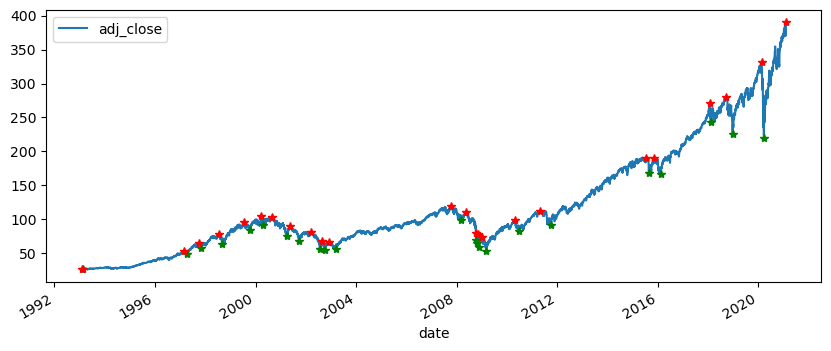

In [4]:
from STIMDataset import LabellingStrategy, STIMDataset
dataset = STIMDataset(csv_file = "SPY.csv", label_method=LabellingStrategy.zigzag, strategy_kwargs={"up_thresh":.02, "down_thresh":-.02})
dataset.show_labeled_data()

In [ ]:
from torch.utils.data.dataloader import DataLoader

dataset_test = STIMDataset(csv_file="SPY_ta.csv")#label_method=LabellingStrategy.zigzag, strategy_kwargs={"up_thresh":.05, "down_thresh":-.05})
dataset_test.transform_to_test()
test_loader = DataLoader(dataset=dataset_test, batch_size=1, shuffle=False)
trainer.test(engine, test_loader)

In [ ]:
engine.

In [ ]:
dataset.show_labeled_data()